# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

# Importing Dataset

In [2]:
with open('train.p',mode='rb') as training_data:
    train=pickle.load(training_data)

In [3]:
with open('test.p',mode='rb') as test_data:
    test=pickle.load(test_data)

In [4]:
with open('valid.p',mode='rb') as validation_data:
    valid=pickle.load(validation_data)

In [5]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

Classifying input and output of dataset(Features-x and labels-y)

In [6]:
x_train,y_train=train['features'],train['labels']

In [7]:
x_train.shape

(34799, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

In [9]:
x_test,y_test=test['features'],test['labels']

In [10]:
x_valid,y_valid=valid['features'],valid['labels']

In [11]:
x_test.shape

(12630, 32, 32, 3)

In [12]:
y_test.shape

(12630,)

In [13]:
x_valid.shape

(4410, 32, 32, 3)

In [14]:
y_valid.shape

(4410,)

HERE WE UNDERSTAND THAT OUR DATASET CONSISTS OF 32*32 INPUT IMAGE WITH 3 CHANNELS (RED,GREEN,BLUE),34799 TRAINING EXAMPLES,4410 VALIDATION EXAMPES AND 12630 TEST EXAMPLES

# Image Visualisation

In [15]:
i=np.random.randint(1,len(x_train))

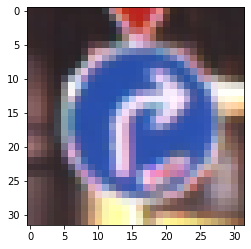

In [16]:
plt.imshow(x_train[i])

In [17]:
y_train[i]

33

In [18]:
classes = np.unique(y_train)

In [19]:
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [20]:
w_grid=5
l_grid=5

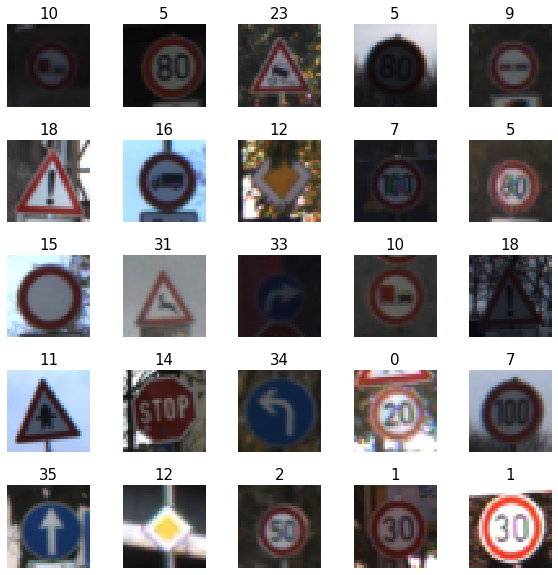

In [21]:
fig,axes=plt.subplots(l_grid,w_grid,figsize=(10,10))
axes=axes.ravel()
n_training=len(x_train)
for i in np.arange(0,w_grid*l_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)


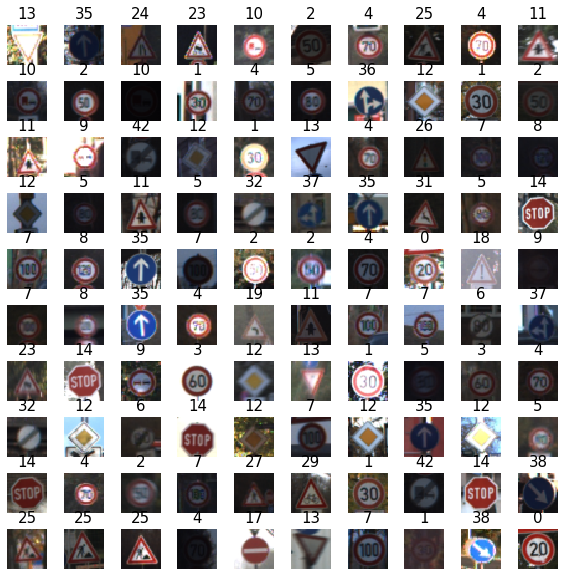

In [22]:
p_grid=10
q_grid=10
fig,axes=plt.subplots(p_grid,q_grid,figsize=(10,10))
axes=axes.ravel()
n_training=len(x_train)
for i in np.arange(0,p_grid*q_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Gray scale conversion and normalisation

In [23]:
from sklearn.utils import shuffle
x_train,y_train=shuffle(x_train,y_train)
x_train_gray=np.sum(x_train/3,axis=3,keepdims=True)

In [24]:
x_test,y_test=shuffle(x_test,y_test)
x_test_gray=np.sum(x_test/3,axis=3,keepdims=True)

In [25]:
x_valid,y_valid=shuffle(x_valid,y_valid)
x_valid_gray=np.sum(x_valid/3,axis=3,keepdims=True)

In [26]:
x_train_gray.shape

(34799, 32, 32, 1)

In [27]:
x_train_gray_norm=(x_train_gray-128)/128
x_train_gray_norm

array([[[[-0.6171875 ],
         [-0.6640625 ],
         [-0.671875  ],
         ...,
         [-0.61979167],
         [-0.63802083],
         [-0.65885417]],

        [[-0.60677083],
         [-0.640625  ],
         [-0.65885417],
         ...,
         [-0.61197917],
         [-0.65104167],
         [-0.68229167]],

        [[-0.5859375 ],
         [-0.6171875 ],
         [-0.63541667],
         ...,
         [-0.55729167],
         [-0.56510417],
         [-0.56510417]],

        ...,

        [[-0.05208333],
         [-0.13020833],
         [-0.2734375 ],
         ...,
         [ 0.40104167],
         [ 0.38802083],
         [ 0.296875  ]],

        [[-0.1796875 ],
         [-0.12239583],
         [-0.15104167],
         ...,
         [ 0.34635417],
         [ 0.30729167],
         [ 0.3046875 ]],

        [[-0.25      ],
         [-0.09114583],
         [-0.00520833],
         ...,
         [ 0.3671875 ],
         [ 0.3828125 ],
         [ 0.56510417]]],


       [[[-0.92447917],


In [28]:
x_train_gray_norm.shape

(34799, 32, 32, 1)

In [29]:
x_test_gray_norm=(x_test_gray-128)/128
x_valid_gray_norm=(x_valid_gray-128)/128

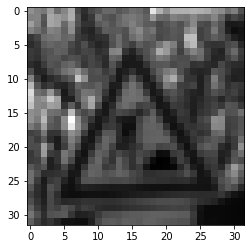

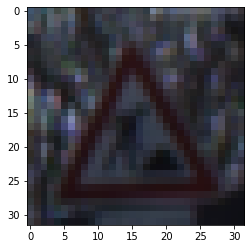

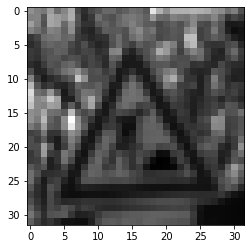

In [30]:
i=random.randint(1,len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(),cmap='gray')


# Building deep neural Model


In [31]:
from tensorflow.keras import datasets,layers,models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense,Activation,ZeroPadding2D,Convolution2D
cnn=models.Sequential()
cnn.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))
cnn.add(layers.AveragePooling2D())
cnn.add(layers.Dropout(0.1)) 
cnn.add(layers.Conv2D(16,(5,5),activation='relu'))  
cnn.add(layers.AveragePooling2D())
cnn.add(layers.Flatten())
cnn.add(layers.Dense(120,activation='relu'))
cnn.add(layers.Dense(84,activation='relu'))
cnn.add(layers.Dense(43,activation='softmax'))
cnn.summary()


Using TensorFlow backend.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
____

# Training CNN

In [32]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=cnn.fit(x_train_gray_norm,y_train,batch_size=500,epochs=50,verbose=1,validation_data=(x_valid_gray_norm,y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 22s 641us/sample - loss: 3.1917 - acc: 0.1670 - val_loss: 2.7933 - val_acc: 0.2560
Epoch 2/50
34799/34799 [==============================] - 19s 534us/sample - loss: 1.9194 - acc: 0.4588 - val_loss: 1.6411 - val_acc: 0.5245
Epoch 3/50
34799/34799 [==============================] - 20s 579us/sample - loss: 1.2003 - acc: 0.6424 - val_loss: 1.1089 - val_acc: 0.6739
Epoch 4/50
34799/34799 [==============================] - 16s 452us/sample - loss: 0.8274 - acc: 0.7540 - val_loss: 0.8794 - val_acc: 0.7424
Epoch 5/50
34799/34799 [==============================] - 16s 454us/sample - loss: 0.6619 - acc: 0.8053 - val_loss: 0.7888 - val_acc: 0.7753
Epoch 6/50
34799/34799 [==============================] - 16s 449us/sample - loss: 0.5502 - acc: 0.8428 - val_loss: 0.7080 - val_acc: 0.7921
Epoch 7/50
34799/34799 [==============================] - 16s 454us/sample - loss: 0.4803 - acc: 0.8641 -

# Acess Trained CNN Model Performance

In [33]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [34]:
accuracy=history.history['acc']
val_accuracy=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

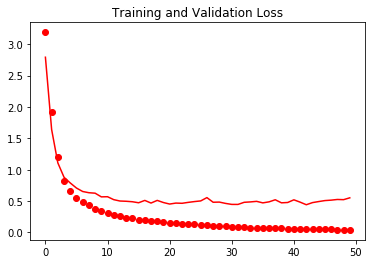

In [35]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and Validation Loss')


In [36]:
predicted_classes=cnn.predict_classes(x_test_gray_norm)
y_true=y_test


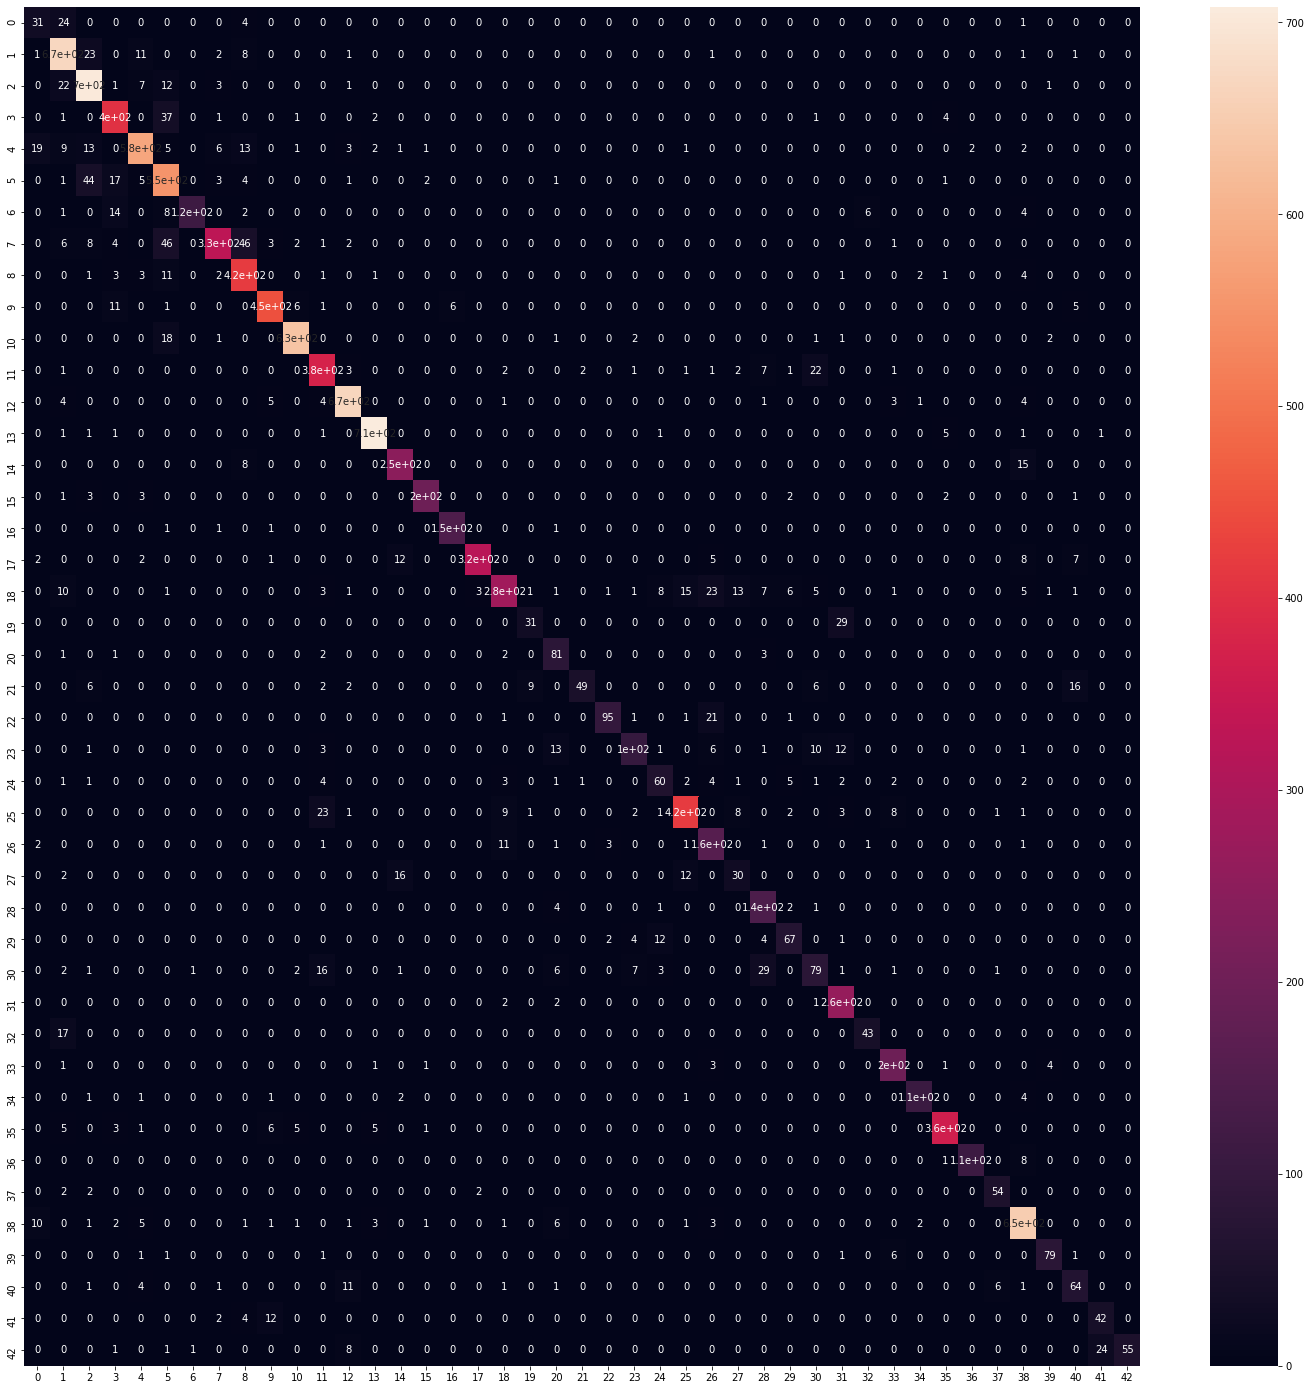

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

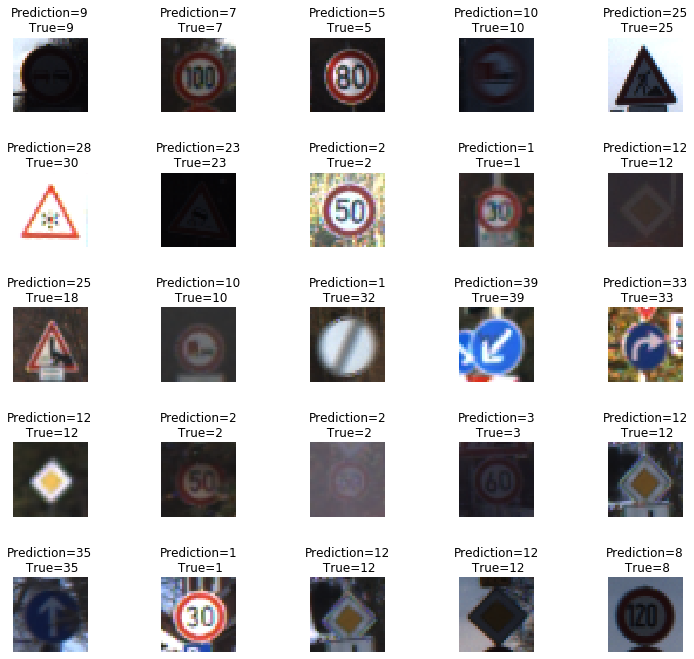

In [38]:
l=5
w=5
fig,axes=plt.subplots(l,w,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,l*w):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction={}\n True={}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)

In [39]:
score=cnn.evaluate(x_test_gray_norm,y_test)
print('Test accuracy:{}'.format(score[1]))

12630/12630 [==============================] - 6s 512us/sample - loss: 0.8702 - acc: 0.8860
Test accuracy:0.8859857320785522
